In [15]:
import pandas as pd
import numpy as np
from scipy.signal import convolve2d
import pickle
import matplotlib.pyplot as plt
import os
import sys
import gc
import seaborn as sn
from netCDF4 import Dataset
from tqdm import tqdm

In [2]:
%matplotlib inline

In [2]:
data = pd.read_csv('./data')
with open('./sigma_vv', 'rb') as vv:
    sigma_vv = pickle.load(vv)
with open('./sigma_vh', 'rb') as vh:
    sigma_vh = pickle.load(vh)


In [3]:
sigma_vv = np.array(sigma_vv)

In [15]:
sigma_vv.shape

(258, 400, 400)

In [3]:
import lg
from scipy import signal

In [4]:
def smooth(img):
    B_x = np.array([1, 1])/2
    B_x2 = np.array([1, 2, 1])/4
    B_y2 = np.array([[1],[2],[1]])/4
    B_x_y2 = np.array([[0,0,1],[0,2,0],[1,0,0]])/4
    B_x__y2 = np.array([[1,0,0],[0,2,0],[0,0,1]])/4
    B2 = B_y2*B_x2
    x = np.array([1, 4, 6, 4, 1])/16
    y = np.reshape(x, (5, 1))
    B4 = y*x
    conv1 = signal.convolve2d(img, B2, mode='valid')
    conv2 = signal.convolve2d(conv1, B4, mode='valid')
    return conv2

In [5]:
def sobel(img):
    r = np.array([[3,0,-3],[10,0,-10],[3,0,-3]])/32
    sob1 = signal.convolve2d(img, r,mode='valid')
    sob2 = signal.convolve2d(img, r.T,mode='valid')
    return sob1, sob2

In [6]:
%matplotlib inline

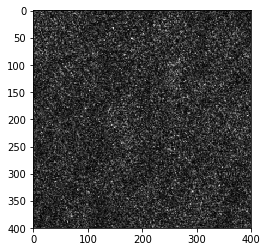

In [24]:
plt.imshow(sigma_vv[0],'gray')

In [25]:
im_sobx, im_soby = sobel(sigma_vv[0])

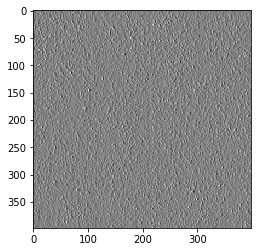

In [27]:
plt.imshow(im_sobx, 'gray')

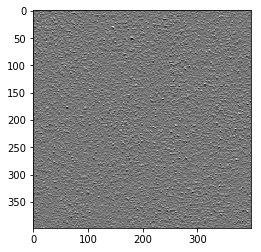

In [28]:
plt.imshow(im_soby, 'gray')

In [29]:
im_smooth = smooth(sigma_vv[0])

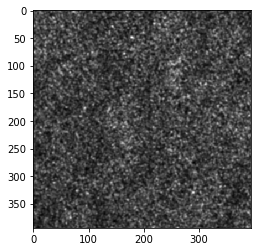

In [31]:
plt.imshow(im_smooth, 'gray')

In [32]:
im_ssobelx, im_ssobely = sobel(im_smooth)

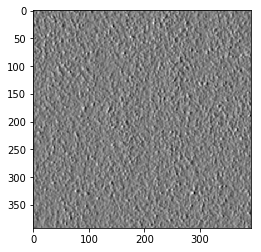

In [33]:
plt.imshow(im_ssobelx, 'gray')

In [34]:
anotention = im_ssobely/im_ssobelx

([array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([391.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([392.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  arra

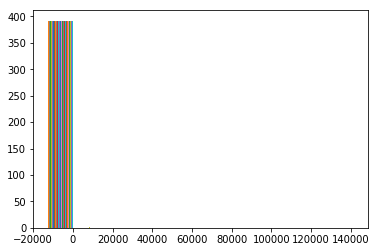

In [35]:
plt.hist(anotention)

In [36]:
plt.show()

In [37]:
anotention

array([[-2.63670047e-01, -2.34794949e-02,  2.75980565e-01, ...,
         1.33930397e-01,  2.09211081e+00, -2.47010506e+00],
       [-2.98167846e-01, -5.29945546e-01, -1.06414678e+00, ...,
         7.53273201e-01,  1.47533334e+00,  3.97159569e+01],
       [ 2.92390935e-01, -5.45771396e-01, -1.76961122e+00, ...,
         1.20807759e+00,  1.02153816e+00, -5.08803577e+00],
       ...,
       [ 2.70934487e+00,  8.21861418e+00, -1.89409598e+01, ...,
        -2.32345039e+00,  1.89068101e+01,  2.64888029e+00],
       [ 1.28810328e+00,  1.45686982e+01, -1.61667959e+00, ...,
        -8.55158366e-01, -7.91093794e-01,  1.03208992e+00],
       [ 3.62537086e-01, -2.37963300e+01, -1.11850651e-01, ...,
         1.10692229e-01,  5.58033156e-01,  1.38850490e+00]])

In [38]:
azimuth = np.arctan(anotention)

In [39]:
azimuth = azimuth%180

In [40]:
azimuth

array([[1.79742197e+02, 1.79976525e+02, 2.69277606e-01, ...,
        1.33138121e-01, 1.12491438e+00, 1.78813876e+02],
       [1.79710225e+02, 1.79512684e+02, 1.79183535e+02, ...,
        6.45592668e-01, 9.75116732e-01, 1.54562285e+00],
       [2.84461464e-01, 1.79500409e+02, 1.78943563e+02, ...,
        8.79355425e-01, 7.96052104e-01, 1.78623270e+02],
       ...,
       [1.21721450e+00, 1.44971649e+00, 1.78481950e+02, ...,
        1.78835635e+02, 1.51795457e+00, 1.20981992e+00],
       [9.10652584e-01, 1.50226351e+00, 1.78983153e+02, ...,
        1.79292519e+02, 1.79330713e+02, 8.01188435e-01],
       [3.47799766e-01, 1.78471202e+02, 1.79888612e+02, ...,
        1.10243428e-01, 5.08989774e-01, 9.46642151e-01]])

([array([199.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 193.]),
  array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 180.]),
  array([198.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 194.]),
  array([188.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 204.]),
  array([184.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 208.]),
  array([194.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 198.]),
  array([211.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 181.]),
  array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 180.]),
  array([201.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 191.]),
  array([192.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.]),
  array([183.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 209.]),
  array([181.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 211.]),
  array([178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 214.]),
  array([176.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 216.]),
  arra

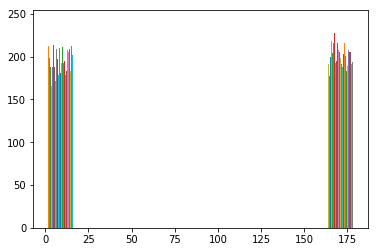

In [42]:
plt.hist(azimuth)

In [43]:
data['wdir'][0]

132

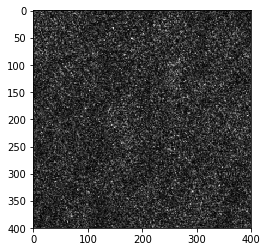

In [47]:
plt.imshow(sigma_vv[0],'gray')

In [48]:
im_smooth = smooth(sigma_vv[0])
im_ssobelx, im_ssobely = sobel(im_smooth)
anotention = im_ssobely/im_ssobelx
azimuth = np.arctan(anotention)
azimuth = azimuth%180

([array([199.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 193.]),
  array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 180.]),
  array([198.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 194.]),
  array([188.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 204.]),
  array([184.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 208.]),
  array([194.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 198.]),
  array([211.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 181.]),
  array([212.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 180.]),
  array([201.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 191.]),
  array([192.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.]),
  array([183.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 209.]),
  array([181.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 211.]),
  array([178.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 214.]),
  array([176.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 216.]),
  arra

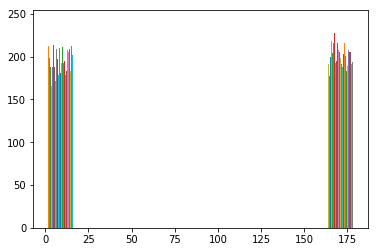

In [49]:
plt.hist(azimuth)

In [51]:
data['wdir'][1]

201

In [52]:
im_smooth = smooth(sigma_vv[1])
im_ssobelx, im_ssobely = sobel(im_smooth)
anotention = im_ssobely/im_ssobelx
azimuth = np.arctan(anotention)
azimuth = azimuth%180

([array([192.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.]),
  array([187.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 205.]),
  array([192.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200.]),
  array([200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 192.]),
  array([202.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 190.]),
  array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 189.]),
  array([195.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 197.]),
  array([189.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 203.]),
  array([200.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 192.]),
  array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 189.]),
  array([204.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 188.]),
  array([198.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 194.]),
  array([186.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 206.]),
  array([160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 232.]),
  arra

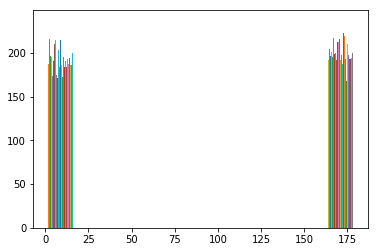

In [53]:
plt.hist(azimuth)

In [54]:
im_smooth = smooth(sigma_vv[2])
im_ssobelx, im_ssobely = sobel(im_smooth)
anotention = im_ssobely/im_ssobelx
azimuth = np.arctan(anotention)/
azimuth = azimuth%180

([array([187.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 205.]),
  array([185.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 207.]),
  array([187.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 205.]),
  array([180.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 212.]),
  array([177.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 215.]),
  array([177.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 215.]),
  array([201.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 191.]),
  array([201.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 191.]),
  array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 189.]),
  array([214.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 178.]),
  array([197.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 195.]),
  array([203.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 189.]),
  array([202.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 190.]),
  array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 176.]),
  arra

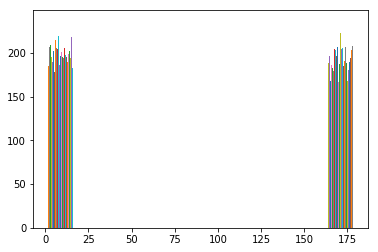

In [55]:
plt.hist(azimuth)

In [56]:
data['wdir'][2]

225

In [57]:
import numpy as np

In [59]:
im_smooth = smooth(sigma_vv[2])
im_ssobelx, im_ssobely = sobel(im_smooth)
anotention = im_ssobely/im_ssobelx
azimuth = np.arctan(anotention)/np.pi*180
azimuth = azimuth%180

([array([34., 21., 22., 27., 19., 19., 18., 17., 10., 18., 19., 11., 15.,
         23., 22., 35., 26., 36.]),
  array([24., 29., 18., 25., 22., 24.,  9., 18., 16.,  9., 21., 17., 19.,
         25., 18., 31., 29., 38.]),
  array([22., 22., 21., 24., 17., 20., 29., 16., 16., 18., 24., 16., 34.,
         17., 18., 19., 33., 26.]),
  array([29., 28., 15., 25., 20., 15., 18., 11., 19., 12., 19., 24., 23.,
         23., 26., 29., 28., 28.]),
  array([26., 26., 27., 21., 19., 16., 15., 13., 14., 14., 17., 15., 20.,
         22., 27., 34., 34., 32.]),
  array([36., 25., 18., 21., 11., 15., 16., 17., 18., 12., 22., 18., 19.,
         26., 20., 36., 30., 32.]),
  array([33., 32., 16., 21., 25., 24., 14., 18., 18., 11.,  7., 16., 17.,
         18., 24., 28., 35., 35.]),
  array([34., 30., 21., 27., 21., 16., 18., 15., 19., 14., 15., 23., 22.,
         21., 20., 18., 24., 34.]),
  array([22., 44., 26., 31., 25., 11.,  7., 21., 16., 20., 11., 13., 22.,
         20., 22., 29., 18., 34.]),
  array([3

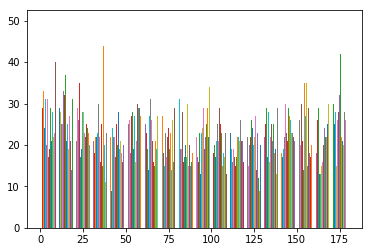

In [61]:
plt.hist(azimuth,bins=18)

In [62]:
im_smooth = smooth(sigma_vv[0])
im_ssobelx, im_ssobely = sobel(im_smooth)
anotention = im_ssobely/im_ssobelx
azimuth = np.arctan(anotention)/np.pi*180
azimuth = azimuth%180
data['wdir'][0]

132

([array([21., 31., 21., 21., 31., 28., 20., 11., 15., 25., 21., 19., 20.,
         31., 24., 19., 21.]),
  array([20., 27., 20., 25., 21., 25., 18., 30., 26., 19., 22., 29., 21.,
         12., 18., 22., 13.]),
  array([22., 21., 23., 22., 26., 26., 24., 14., 20., 21., 23., 20., 23.,
         33., 20., 13., 19.]),
  array([28., 17., 28., 21., 26., 18., 17., 16., 17., 23., 21., 30., 22.,
         16., 30., 23., 22.]),
  array([15., 24., 20., 15., 17., 21., 26., 25., 21., 21., 32., 20., 22.,
         18., 16., 21., 24.]),
  array([19., 21., 21., 27., 10., 18., 22., 30., 26., 34., 22., 21., 25.,
         20., 18., 18., 20.]),
  array([26., 26., 19., 32., 23., 23., 27., 19., 16., 26., 19., 19., 11.,
         23., 15., 22., 21.]),
  array([34., 15., 39., 29., 20., 23., 15., 17., 20., 12., 18., 17., 22.,
         20., 20., 25., 21.]),
  array([27., 26., 23., 20., 17., 19., 29., 24., 16., 17., 26., 14., 28.,
         20., 25., 24., 21.]),
  array([26., 14., 19., 25., 24., 19., 16., 22., 27., 1

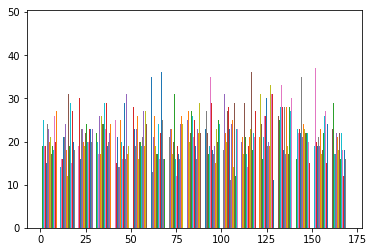

In [68]:
plt.hist(azimuth,bins=bins)

In [70]:
np.histogram(azimuth, bins=bins)

(array([8498, 8344, 8519, 8149, 8137, 8270, 8164, 8258, 8473, 8559, 8781,
        8867, 8819, 8945, 8766, 8832, 8587, 8696]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180]))

In [69]:
bins = np.arange(19)*10

In [78]:
im_smooth = smooth(sigma_vv[3])
im_ssobelx, im_ssobely = sobel(im_smooth)
anotention = im_ssobely/im_ssobelx
azimuth = np.arctan(anotention)/np.pi*180
azimuth = azimuth%180
print(data['wdir'][3])
np.histogram(azimuth, bins=bins)

181


(array([8764, 8610, 8630, 8295, 8295, 7990, 8399, 8200, 8205, 8351, 8341,
        8617, 8598, 8907, 8712, 8871, 8896, 8983]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180]))

In [80]:
his,bins = np.histogram(azimuth, bins=bins)

In [82]:
np.argmax(his)*10+5

175

In [84]:
im_smooth = smooth(sigma_vv[15])
im_ssobelx, im_ssobely = sobel(im_smooth)
anotention = im_ssobely/im_ssobelx
azimuth = np.arctan(anotention)/np.pi*180
azimuth = azimuth%180
print(data['wdir'][15])
his,bins = np.histogram(azimuth, bins=bins)
np.argmax(his)*10+5

186


35

In [43]:
def wind_direction(vv):
    bins1=np.arange(19)*10
#     im_smooth = smooth(vv)
    im_ssobelx, im_ssobely = sobel(vv)
    anotention = im_ssobely/im_ssobelx
    azimuth = np.arctan(anotention)/np.pi*180
    azimuth1 = azimuth%180
    his,bins2 = np.histogram(azimuth1, bins=bins1,range=(0,180))
    direction2 = np.argmax(his)*10+5
    del bins2
    del bins1
    return direction2

In [41]:
def distance(d1, d2):
    if np.abs(d1-d2)>180:
        return 360-np.abs(d1-d2)
    else:
        return np.abs(d1-d2)

In [42]:
def ambugity_remove(dire_, dire_ndbc):
    if distance(dire_, dire_ndbc)>distance((dire_+180)%360, dire_ndbc):
        return (dire_+180)%360, distance((dire_+180)%360, dire_ndbc)
    else:
        return dire_, distance(dire_, dire_ndbc)

In [9]:
from tqdm import tqdm

In [133]:
t = []
error = []
dd = []
filter_list =os.l
for s_vv,dir1 in tqdm(zip(sigma_vv,wdir)):
    direction1 = wind_direction(s_vv)
    dd.append(direction1)
    d, e= ambugity_remove(direction1, dir1)
    t.append(d)
    error.append(e)

67it [00:03, 22.13it/s]/Users/yangchao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide
258it [00:11, 21.80it/s]


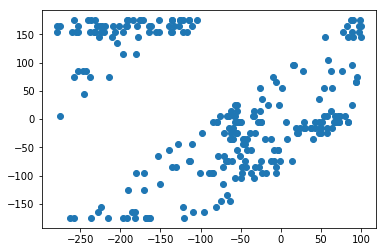

In [134]:
plt.scatter(wdir,t)

In [135]:
error = np.array(error)

In [136]:
rmse = np.sqrt(np.sum(np.power(error,2))/len(t))

In [137]:
rmse

53.804916060226894

In [29]:
wdir = []
for x in data['wdir']:
    if x>180:
        wdir.append(x-360)
    else:
        wdir.append(x)

In [84]:
np.arctan(-1)

-0.7853981633974483

In [131]:
data['scending'].head(5)

0    Ascending
1    Ascending
2    Ascending
3    Ascending
4    Ascending
Name: scending, dtype: object

In [132]:
wdir = []
for i, x in enumerate(data['wdir']):
    if data['scending'][i]=='Ascending':
        wdir.append(x-260)
    elif data['scending'][i] == 'Descending':
        wdir.append(x-280)
    else:
        print('error')

In [138]:
from cmod5n import cmod5n_forward

In [141]:
from c_2pod import inverse_c_2pod

In [165]:
wspeed_c2pod = inverse_c_2pod(np.array(sigma_vh_db))

In [10]:
sigma_vh_db = []
for x in sigma_vh:
    sigma_vh_db.append(np.mean(x))

In [11]:
sigma_vh_db = 10*np.log10(sigma_vh_db)

/Users/yangchao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Warning: converting a masked element to nan.
  if __name__ == '__main__':


In [168]:
np.argmin(sigma_vh_db)

229

In [12]:
data['sigma_vh'] = sigma_vh_db

In [15]:
data.reset_index(drop=True, inplace=True)

In [13]:
data.drop(133, inplace=True)

In [14]:
data.drop(229, inplace=True)

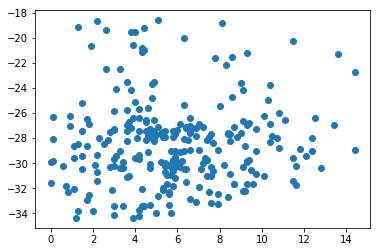

In [17]:
%matplotlib inline
plt.scatter(data['wspeed'], data['sigma_vh'])

In [213]:
data.cov()

height          wdir     wspeed   sigma_vh
height    76.150309      4.227624   2.875957   5.454628
wdir       4.227624  11140.918612 -19.985277  -7.137935
wspeed     2.875957    -19.985277   9.351305   0.493632
sigma_vh   5.454628     -7.137935   0.493632  11.655896

In [216]:
from skimage import filters

In [217]:
data.to_csv('dataset.csv', index=False)

In [1]:
import seaborn as sn

/Users/yangchao/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


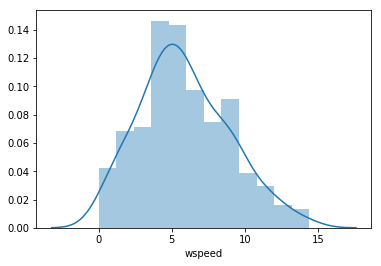

In [19]:
sn.distplot(data['wspeed'])

In [219]:
lm = linear_model.LinearRegression()

In [221]:
lm.fit(np.reshape(data['wspeed'], (-1, 1)), np.reshape(data['sigma_vh'],(-1, 1)))

/Users/yangchao/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [222]:
lm.coef_

array([[0.05278754]])

In [223]:
lm.intercept_

array([-28.66112054])

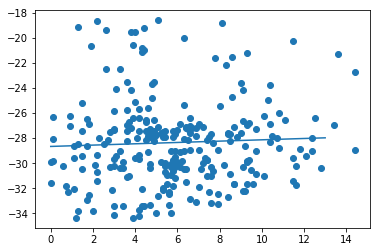

In [225]:
plt.figure()
plt.scatter(data['wspeed'], data['sigma_vh'])
plt.plot(range(14), np.squeeze(lm.coef_)*range(14)+np.squeeze(lm.intercept_))

/Users/yangchao/anaconda/lib/python3.5/site-packages/pandas/core/dtypes/cast.py:703: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype)
/Users/yangchao/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:544: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


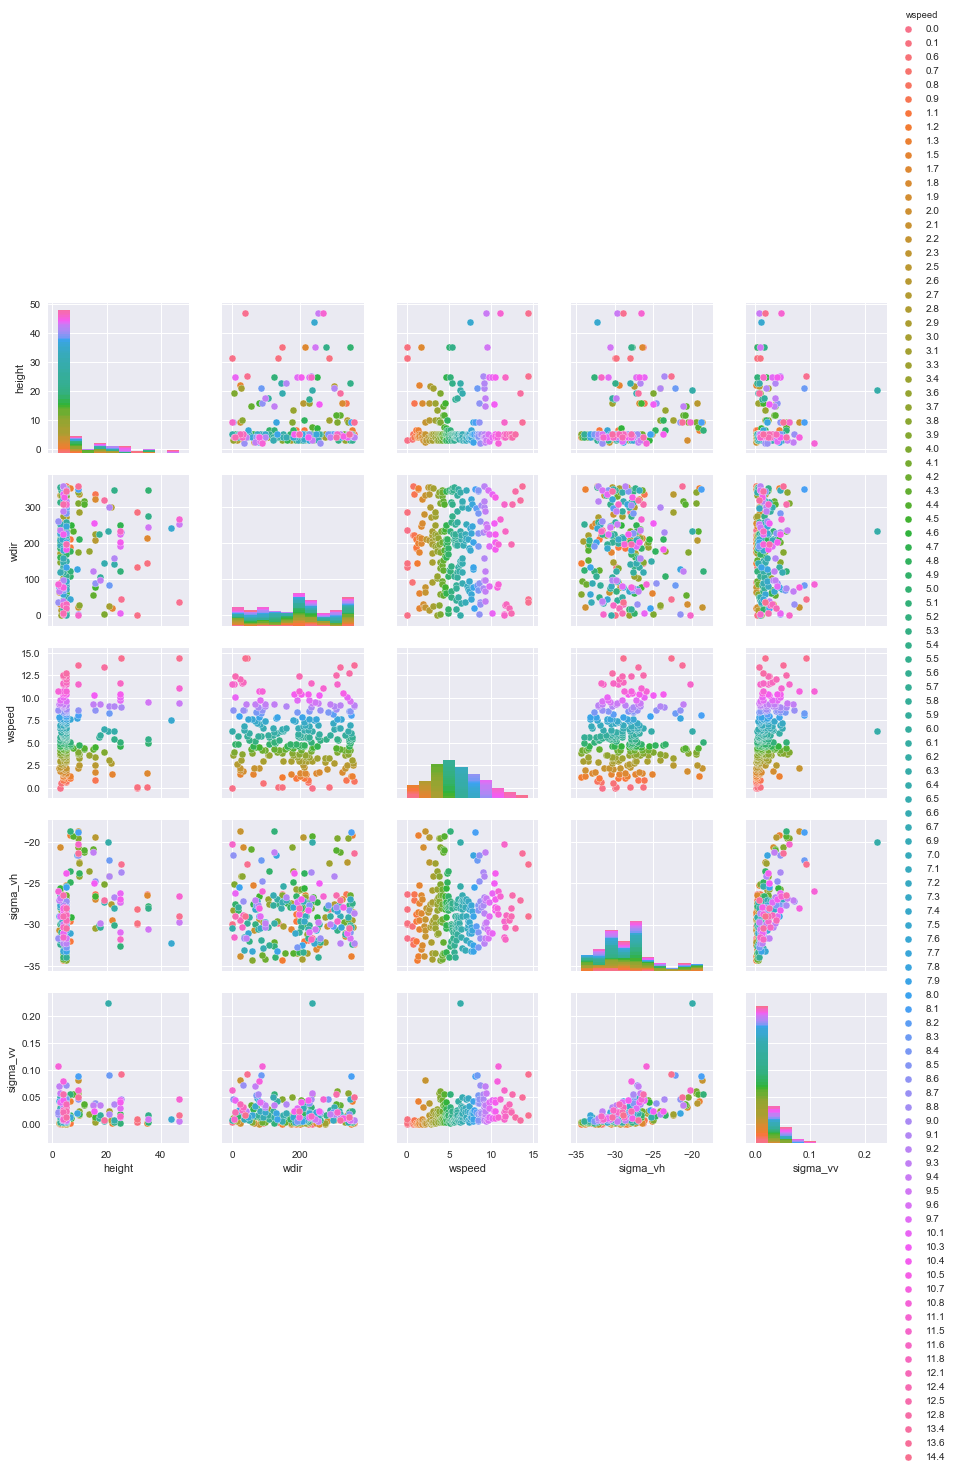

In [229]:
sn.set()
sn.pairplot(data,hue='wspeed')

In [20]:
import plotly.plotly as py

In [30]:
import plotly.offline as ofpy

In [21]:
from plotly.graph_objs import *

In [23]:
data1 = [Bar(x=data['wspeed'], y=data['sigma_vv'])]

In [34]:
ofpy.iplot(data1,filename='dd')

In [33]:
import plotly
plotly.offline.init_notebook_mode()

In [38]:
plotly.__version__

'2.0.7'

In [12]:
ff = Dataset('/Volumes/Yangchao/speckle/Boxcar/Ascending_41001_subset_132_ 4.0_4.0_S1A_IW_GRDH_1SDV_20170629T224915_20170629T224940_017255_01CCB2_E50C')

In [20]:
ff.variables['Sigma0_VV'][:].shape

(400, 400)

In [16]:
ss={'dd':1}

In [17]:
ss.keys

<function dict.keys>

In [44]:
t = {}
error = {}
dd={}
wdir={}
wspeed={}
filter_list =os.listdir('/Volumes/Yangchao/speckle/')
sigma_vv = {}
ascending= {}
for flter_l in tqdm(filter_list):
    f_list = os.listdir('/Volumes/Yangchao/speckle/'+flter_l)
    sigma_vv[flter_l]=[]
    wdir[flter_l]=[]
    wspeed[flter_l]=[]
    ascending[flter_l]=[]
    for f in f_list:
        file_ = Dataset('/Volumes/Yangchao/speckle/'+flter_l+'/'+f)
        sigma_vv[flter_l].append(file_.variables['Sigma0_VV'][:])
        wdir[flter_l].append(f.split('_')[3])
        ascending[flter_l].append(f.split('_')[0])
        wspeed[flter_l].append(f.split('_')[4])



100%|██████████| 8/8 [01:24<00:00, 10.57s/it]


In [45]:

param = {'Ascending':80, 'Descending':280
        }
ascending_pd = pd.DataFrame(ascending)

In [46]:
for flter_l in tqdm(sigma_vv.keys()):
    t[flter_l]=[]
    error[flter_l]=[]
    dd[flter_l]=[]
    for s_vv,dir1,asc in tqdm(zip(sigma_vv[flter_l],wdir[flter_l],ascending[flter_l])):
        if asc=='Ascending':
            dir1 = (int(dir1)-80)%360
        elif asc == 'Descending':
            dir1 = (int(dir1)-280)%360
        direction1 = wind_direction(s_vv)
        dd[flter_l].append(direction1)
        d, e= ambugity_remove(direction1, dir1)
        t[flter_l].append(d)
        error[flter_l].append(e)

  0%|          | 0/8 [00:00<?, ?it/s]
0it [00:00, ?it/s]
3it [00:00, 23.92it/s]
7it [00:00, 28.21it/s]
11it [00:00, 30.92it/s]
14it [00:00, 29.45it/s]
18it [00:00, 30.31it/s]
22it [00:00, 30.90it/s]
26it [00:00, 31.05it/s]
30it [00:00, 31.38it/s]
34it [00:01, 31.67it/s]
38it [00:01, 31.93it/s]
42it [00:01, 32.09it/s]
46it [00:01, 32.33it/s]
50it [00:01, 32.49it/s]
54it [00:01, 32.61it/s]
58it [00:01, 32.28it/s]
62it [00:01, 32.34it/s]
66it [00:02, 32.51it/s]
70it [00:02, 32.68it/s]
74it [00:02, 32.82it/s]
78it [00:02, 32.92it/s]
82it [00:02, 33.03it/s]
86it [00:02, 33.16it/s]
90it [00:02, 33.25it/s]
94it [00:02, 33.29it/s]
98it [00:02, 33.35it/s]
102it [00:03, 33.43it/s]
106it [00:03, 33.50it/s]
110it [00:03, 33.59it/s]
114it [00:03, 33.65it/s]
118it [00:03, 33.71it/s]
122it [00:03, 33.76it/s]
126it [00:03, 33.82it/s]
130it [00:03, 33.87it/s]
134it [00:03, 33.91it/s]
138it [00:04, 33.96it/s]/Users/yangchao/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: in

158it [00:05, 30.91it/s]
161it [00:05, 30.83it/s]
165it [00:05, 30.85it/s]
168it [00:05, 30.79it/s]
171it [00:05, 30.74it/s]
174it [00:05, 30.64it/s]
177it [00:05, 30.57it/s]
180it [00:05, 30.50it/s]
183it [00:06, 30.45it/s]
186it [00:06, 30.40it/s]
189it [00:06, 30.34it/s]
192it [00:06, 30.32it/s]
195it [00:06, 30.28it/s]
199it [00:06, 30.31it/s]
202it [00:06, 30.26it/s]
206it [00:06, 30.25it/s]
209it [00:06, 30.23it/s]
212it [00:07, 30.20it/s]
215it [00:07, 30.17it/s]
218it [00:07, 30.12it/s]
221it [00:07, 30.09it/s]
224it [00:07, 30.07it/s]
227it [00:07, 30.03it/s]
230it [00:07, 30.01it/s]
233it [00:07, 29.98it/s]
236it [00:07, 29.93it/s]
239it [00:07, 29.91it/s]
242it [00:08, 29.88it/s]
245it [00:08, 29.88it/s]
249it [00:08, 29.91it/s]
252it [00:08, 29.89it/s]
255it [00:08, 29.84it/s]
258it [00:08, 29.79it/s]
261it [00:08, 29.73it/s]
264it [00:08, 29.69it/s]
 50%|█████     | 4/8 [00:38<00:38,  9.63s/it]
0it [00:00, ?it/s]
3it [00:00, 28.18it/s]
6it [00:00, 28.03it/s]
10it [00:00, 2

126it [00:03, 33.47it/s]
130it [00:03, 33.52it/s]
134it [00:03, 33.62it/s]
138it [00:04, 33.67it/s]
142it [00:04, 33.77it/s]
146it [00:04, 33.82it/s]
150it [00:04, 33.93it/s]
154it [00:04, 33.85it/s]
158it [00:04, 33.91it/s]
162it [00:04, 33.84it/s]
166it [00:04, 33.82it/s]
170it [00:05, 33.84it/s]
174it [00:05, 33.88it/s]
178it [00:05, 33.85it/s]
182it [00:05, 33.84it/s]
186it [00:05, 33.83it/s]
190it [00:05, 33.72it/s]
194it [00:05, 33.61it/s]
198it [00:05, 33.65it/s]
202it [00:06, 33.66it/s]
206it [00:06, 33.75it/s]
210it [00:06, 33.78it/s]
214it [00:06, 33.83it/s]
218it [00:06, 33.76it/s]
222it [00:06, 33.55it/s]
226it [00:06, 33.53it/s]
230it [00:06, 33.46it/s]
234it [00:07, 33.37it/s]
238it [00:07, 33.23it/s]
242it [00:07, 33.25it/s]
247it [00:07, 33.37it/s]
251it [00:07, 33.39it/s]
255it [00:07, 33.44it/s]
259it [00:07, 33.45it/s]
263it [00:07, 33.48it/s]
100%|██████████| 8/8 [01:12<00:00,  9.11s/it]


In [30]:
t.keys()

dict_keys(['Boxcar', 'Gamma Map', 'Frost', 'IDAN', 'Lee Sigma', 'Median', 'Lee', 'Refined Lee'])

In [47]:
wdir_pd = pd.DataFrame(wdir)

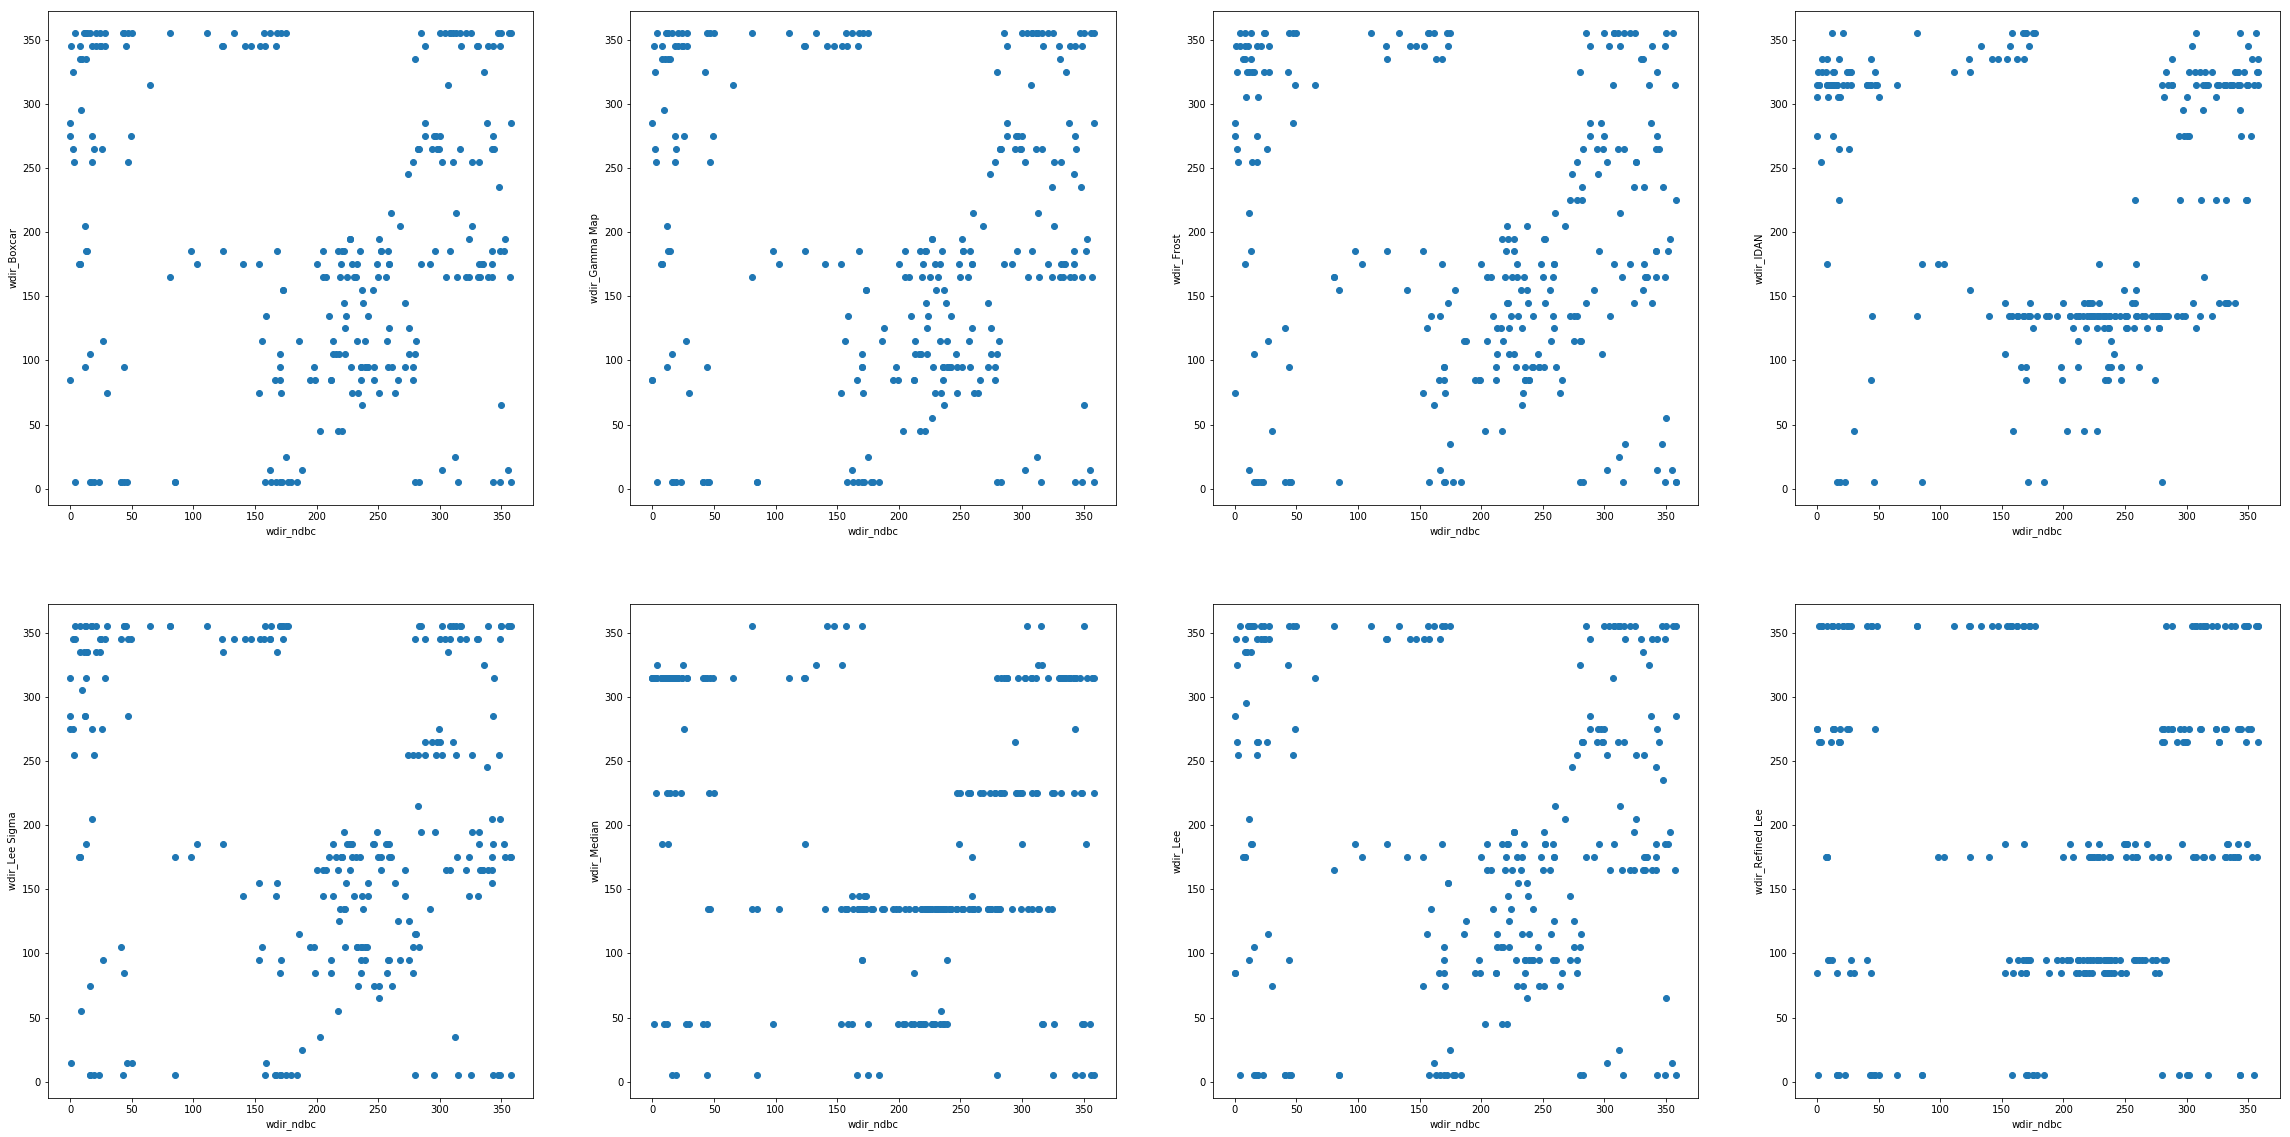

In [52]:
plt.figure(figsize=(40,20))
for i, k in enumerate(t.keys()):
    new = (wdir_pd[k].astype('int8')-ascending_pd[k].map(param))%360
    plt.subplot(2,4,i+1)
    
    plt.scatter(new, t[k])
    plt.xlabel('wdir_ndbc')
    plt.ylabel('wdir_'+k)
plt.savefig('result.eps')

In [53]:
for k in t.keys():
    print(np.sqrt(np.sum(np.power(error[k],2))/len(error[k])))

53.017120766216856
52.95373559256747
51.8053687026267
50.68906323927748
53.95266968406416
52.65931801291112
53.0085788713701
49.642723535277554
